# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>

In [2]:
#Loading the dataset
visa=pd.read_csv('EasyVisa.csv')

<IPython.core.display.Javascript object>

In [3]:
#Creating a copy of the data set to work on
data=visa.copy()

<IPython.core.display.Javascript object>

In [4]:
#Checking the first few rows of the data set
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
#Checking the last few rows of the data set
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [6]:
#Checking the shape of the data
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

Observations: there are 25,480 rows and 12 columns in the data set.

In [7]:
#Checking the info of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

Observations: We can see the different types of data present. 
- There are 9 object columns, 2 integer columns and 1 float column. 
- I will convert all object columns to categorical so that the memory used can be reduced
- I will also be dropping the case_id column soon, since it is an identifier column

In [8]:
# converting all object type columns into categorical column
for col in data.columns[data.dtypes=='object']:
    data[col] = data[col].astype('category')

<IPython.core.display.Javascript object>

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

Observations:
- from the statistical summary, we can see that some employers have as much as 602,069 employees. we can also see that the minimum is -26. There seems to be an error with the negative sign as it is impossible to have -26 people as employees. It is unlikely that the number of employees is zero as if it is so, they may not be seeking international talent yet. therefore, it is most likely an error with the negative sign. we will change it to positive before moving on.
- the average no of employees is much larger than the median, indicating the presence of a lot of outliers and skewness in the distribution. 
- The median year of establishment is 1997 while the mean is 1979. we can also see that at least one of the companies have been established since 1800 and is the oldest company in the data set.
- The prevailing wage has very wide gaps between minimum and maximum and this is due to the difference in units of wage. the minimum prevailing wage which is 2.1367 most likely has a unit of 'hourly' while the largest: 319,210.27 most likely has a unit of 'yearly'

In [10]:
#showing all the rows with negative values in the no_of_employees column
data[data.no_of_employees<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


<IPython.core.display.Javascript object>

Observation: 
- There are 33 rows that have negative values for the number of employees. to treat them, i will change them to positive values.

In [11]:
#Changing all negative number of employees to positive
data["no_of_employees"] = (data["no_of_employees"]).abs()

<IPython.core.display.Javascript object>

In [12]:
#checking if there are still any negative values in the column.
data[data.no_of_employees<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


<IPython.core.display.Javascript object>

Observations:
- the negative values in the employee number column has been addressed.

In [13]:
#Checking for duplicates in the data set
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

Observations:
There are no duplicates in the data set

In [14]:
#Checking for null values in the data set
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

Observations: There are no null values in the data set

In [15]:
#Checking the count of each unique value in the dataset
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

<IPython.core.display.Javascript object>

Observation:
- Since there are 25480 unique values in the case_id column, we will need to drop it as it is an identifier column.

In [16]:
# Dropping the case_id column since it's an identifier column
data.drop(['case_id'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
#Checking the first few lines after dropping the case _id column
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [18]:
# filtering category type columns to check out the properties 
cat_columns = data.describe(include=["category"]).columns
cat_columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
#creating a for loop to check the details and unique values in the category columns
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

<IPython.core.display.Javascript object>

Observations:
- 6 continents are represented in the continents column
- There are 4 levels of education represented in the data set, with Bachelor's having the highest count
- There are yes or no values in the job experience and job training columns
- 5 unique regions are represented in the data set
- For the unit of wage, the most prominent is yearly, followed by Hourly. This will explain the great variation in the mean,minimum, median and maximum values.
- We can see that more people are in full time positions
- for the case status which is our target variable, more people had approvals than denials in their visas

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [20]:
#I will define the functions for the EDA to make exploring the data easier.
#defining the function to plot histograms and box charts for all variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [22]:
#Function to create stacked barplots
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [23]:
### function to plot distributions with respect to target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

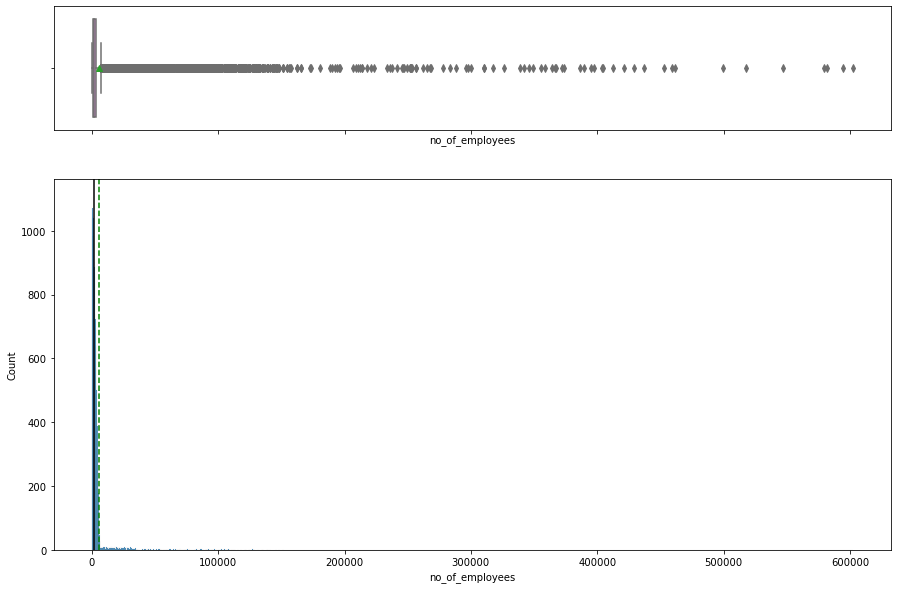

<IPython.core.display.Javascript object>

In [24]:
#plotting the histogram and boxplot for number of employees
histogram_boxplot(data, "no_of_employees")

Observations:
- Here, we can see that the distribution is right skewed and with a large number of outliers.
- This is due to the fact that companies of different sizes are represented in the data set, it is possible that companies who have been more recently established have much less no of employees than companies who have been in business for much longer.

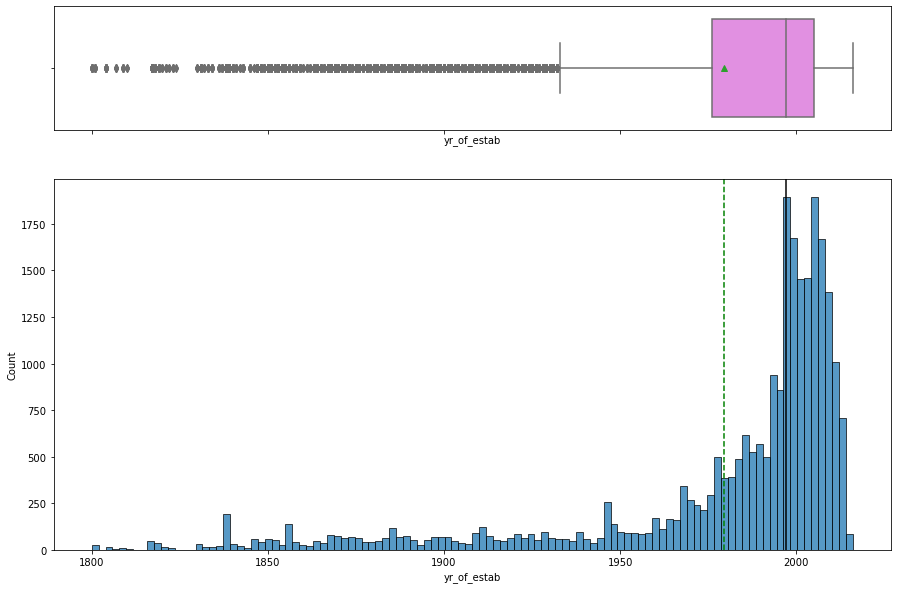

<IPython.core.display.Javascript object>

In [25]:
#plotting the histogram and boxplot for year of establishment
histogram_boxplot(data, "yr_of_estab")

Observations:
- The distribution of the year of establishment for companies is heavily left skewed.
- The average year of establishment is around 1979 while the median is around 1997.
- We can see that the companies established more recently have higher counts in the data set. i can assume that companies established much earlier (from 1800) would probably have a very large staff strength based which they have consistently built over the years and hence would only be looking to hire a few more hands.. In the case of companies that are more recently established, they probably need a lot more hands to grow their companies into a much bigger establishment and would have plenty room to accomodate larger number of employees.


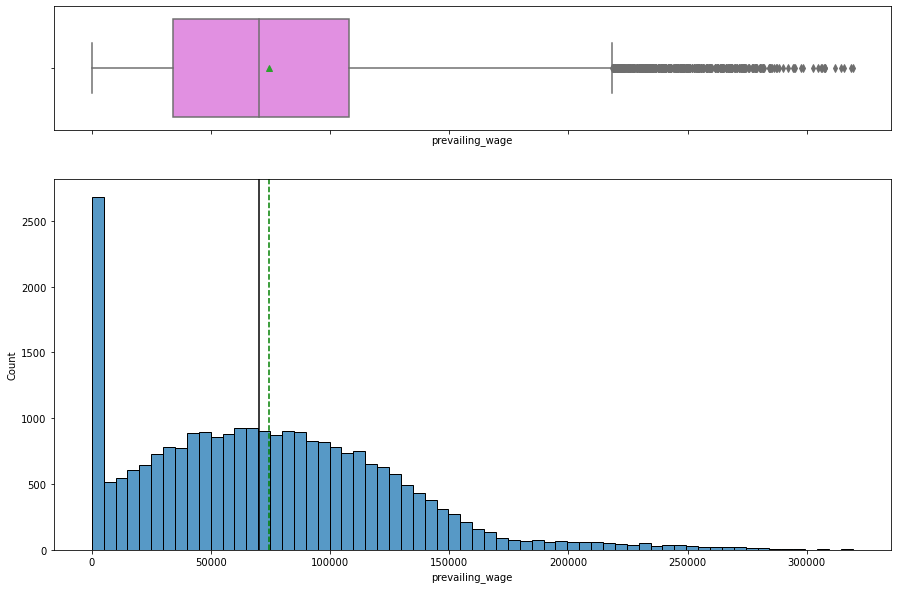

<IPython.core.display.Javascript object>

In [26]:
#plotting the histogram and boxplot for prevailing wage
histogram_boxplot(data, "prevailing_wage")

Observations:
- The distribution is right skewed with the mean slightly larger than the median
- The highest count is between 0 and 100 dollars. We need to consider here that some of the values have different units (hourly,daily,weekly, monthly and yearly) when we are making any predictions or decisions concerning this variable.  

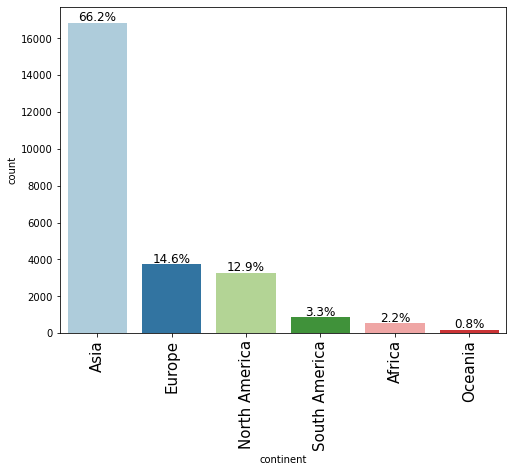

<IPython.core.display.Javascript object>

In [27]:
#plotting the barplot for continent
labeled_barplot(data,"continent",perc=True)

Observations: 
- Most of the employees are Asian, and the perv=centage of asian employees are larger than all the other continents combined
- Oceania has the least representation

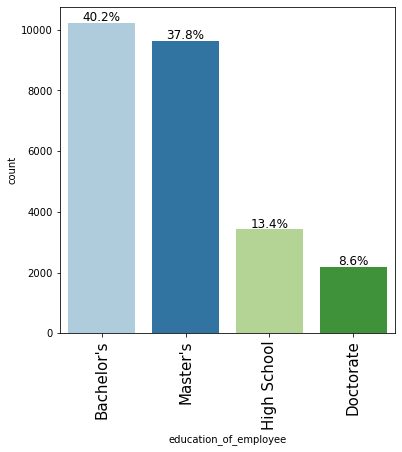

<IPython.core.display.Javascript object>

In [28]:
#plotting the barplot for education of employee
labeled_barplot(data,"education_of_employee",perc=True)

Observations:
- Most of the employees have a bachelors degree, the percentage of people who have a masters degree is only slightly lower than the bachelor's 
- very few employees have doctorate degrees 

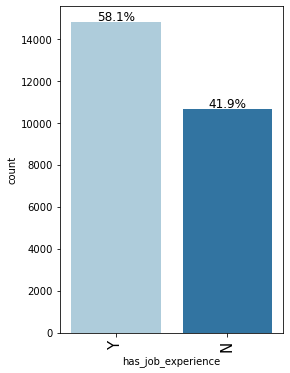

<IPython.core.display.Javascript object>

In [29]:
#plotting the barplot for has job experience
labeled_barplot(data,"has_job_experience",perc=True)

Observations
 - There is a higher percentage of employees with job experience than those without.

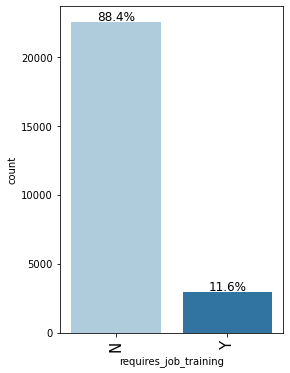

<IPython.core.display.Javascript object>

In [30]:
#plotting the barplot for requires_job_training
labeled_barplot(data,"requires_job_training",perc=True)

Observations:
- The employees that require job training are significantly more than those that require.
- This may be because of their educational level. it would not be surprising that companies would prefer employees that do not require training as it saves them cost of training

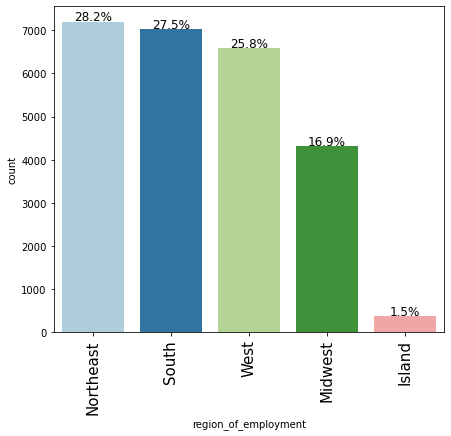

<IPython.core.display.Javascript object>

In [31]:
#plotting the barplot for region of employment
labeled_barplot(data,"region_of_employment",perc=True)

Observations:
- The island region has the lowest percentage of employees, followe dby the midwest region.
- The Northeast, South and West regions are closely following each other in the percentage of employees with the Northeast region leading the pack with 28.2% employees.

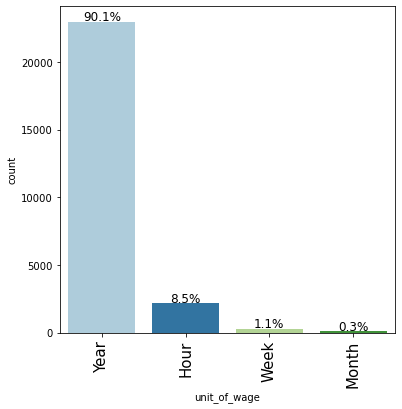

<IPython.core.display.Javascript object>

In [32]:
#plotting the barplot for unit of wage
labeled_barplot(data,"unit_of_wage",perc=True)

Observations:
- The most used unit of wage is the year unit, which really explains the heavy skewness of the prevailing wage distribution.
- The year unit is distantly followed by the hour unit
- Only few use months and weeks as the unit of prevailing wage


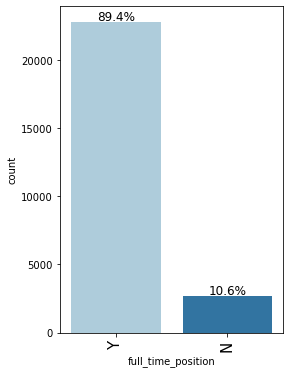

<IPython.core.display.Javascript object>

In [33]:
#plotting the barplot for full time position
labeled_barplot(data,"full_time_position",perc=True)

Observations:
- Full time position of work has the highest percentage.
- Employees may not be willing to relocate only for a part time or contract position. likewise, employers would most likely prefer to invest in employees that will be employed in a full time position. 

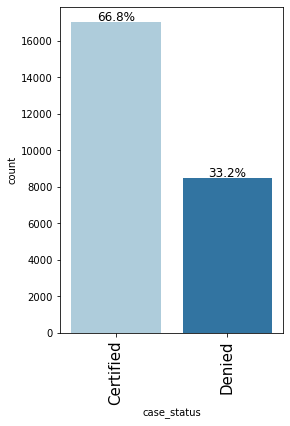

<IPython.core.display.Javascript object>

In [34]:
#plotting the barplot for case_status
labeled_barplot(data,"case_status",perc=True)

Observations:
- 66.8% of the employees are certified while 33.2% are denied.
- We will consider this in the splitting of our data set and building of our model as this is our target variable

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


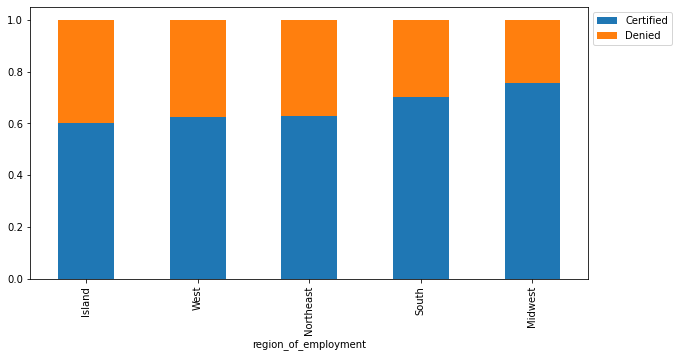

<IPython.core.display.Javascript object>

In [35]:
#Checking the stacked barplot for region of employment and case status
stacked_barplot(data, "region_of_employment", "case_status")

Observations:
- The Midwest and South regions have the least percentage of denied applications
- Regions like island and west are often denied

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


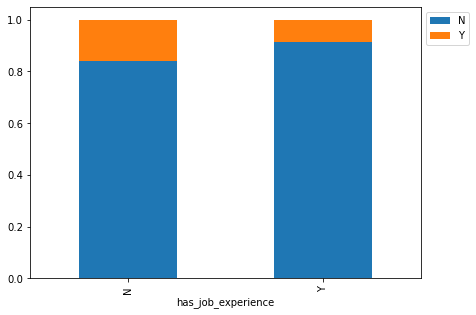

<IPython.core.display.Javascript object>

In [36]:
#plotting a barplot to see the relationship between job experience and job training. 
stacked_barplot(data, "has_job_experience", "requires_job_training")

Observations:
- Most employees that have job experience do not require job training. those that may require could possibly be switching to a caree or field that they have recently transitioned to.

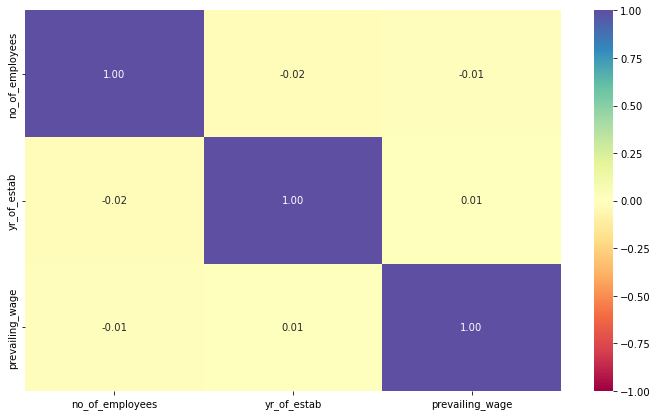

<IPython.core.display.Javascript object>

In [37]:
#plotting a correlation heat map
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:
- We can observe that there is pretty much no correlation between the numerical variables, which is great.

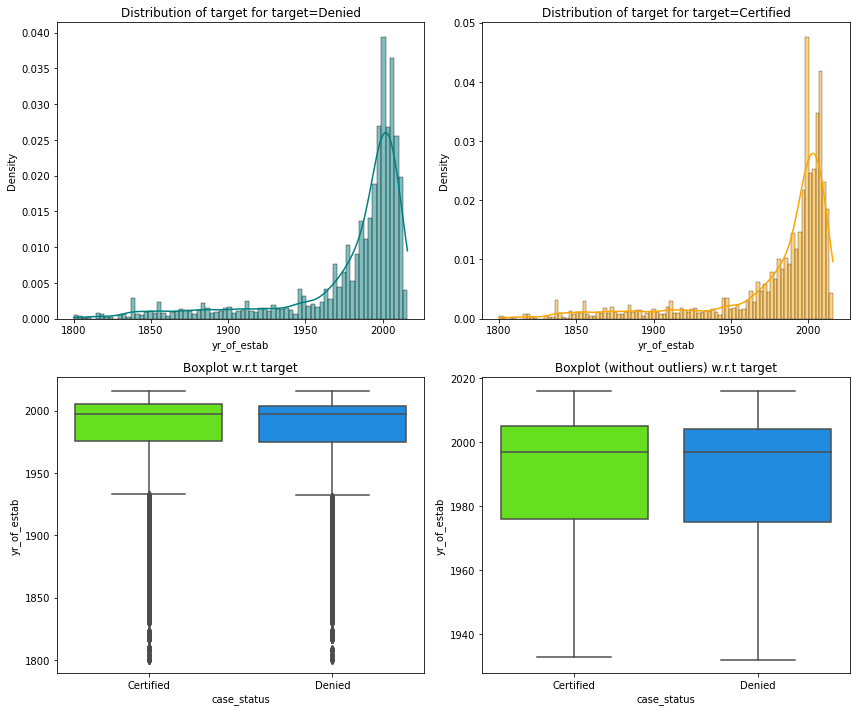

<IPython.core.display.Javascript object>

In [38]:
# Checking the distribution of year of establishment with respect to target
distribution_plot_wrt_target(data,'yr_of_estab','case_status') 

Observations:
- From the density plots, we can see that there is no significant difference between the densities of the certified and denied applications as regards their year of establishment
- from the box plot, with and without outliers, we can observe the same thing, there is a slight difference between the year of establishment of the companies that had certified applications and those that had denials

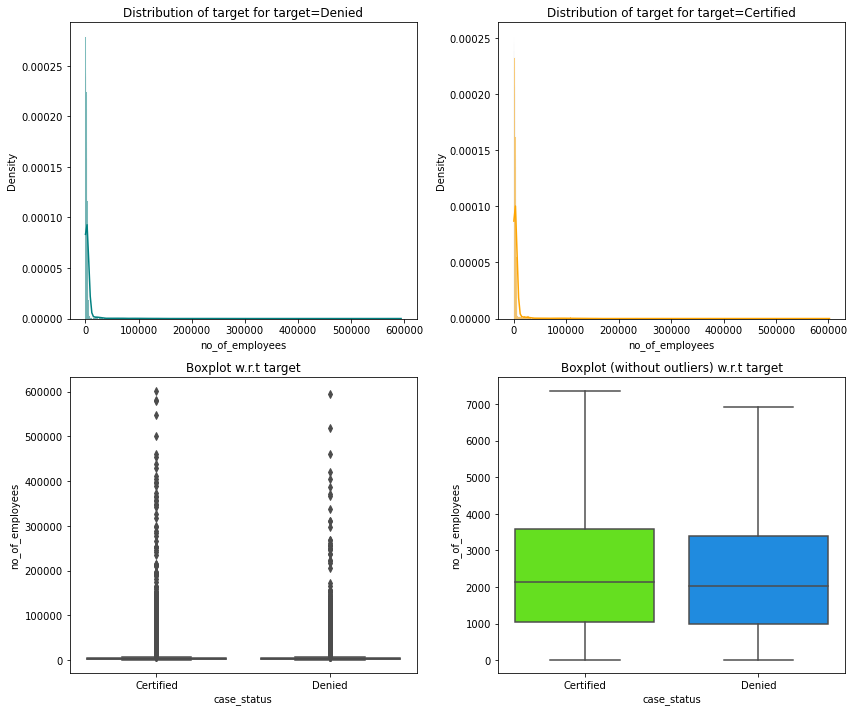

<IPython.core.display.Javascript object>

In [39]:
# Checking the distribution of number of employees with respect to target
distribution_plot_wrt_target(data,'no_of_employees','case_status')

Observations:
- From the density plot and box plots, the applications that were certified have slighly higher number of employees than the applications that were denied.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


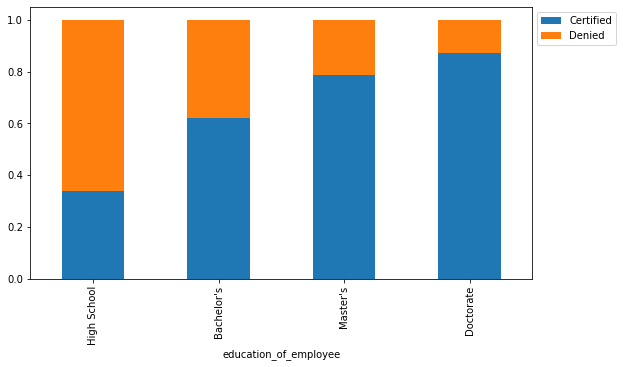

<IPython.core.display.Javascript object>

In [40]:
#plotting the stacked barplot for education of employee and case status
stacked_barplot(data, "education_of_employee", "case_status")

Observations: 
- It seems education does play a role in the case status. we can see that most employees with doctorate degrees are certified. Masters degree holders also have a hgigher rate of certification that bachelors degree holder. 
- Those with high school certification are more likely to be denied than certified. 
- fron this, it seems that the higher your level of education, the higher the likelihood of your application being certified.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


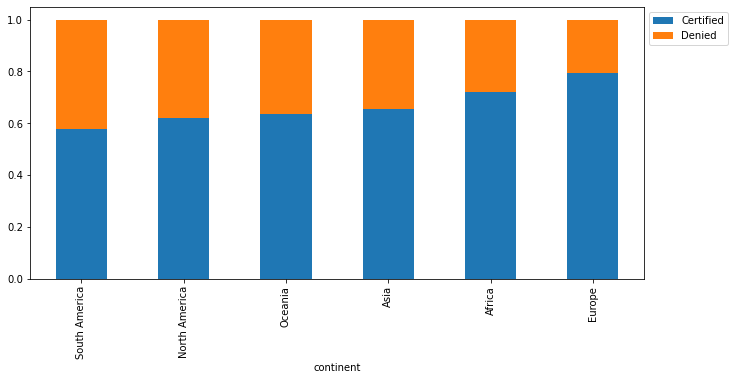

<IPython.core.display.Javascript object>

In [41]:
#plotting the stacked barplot for education of employee and case status
stacked_barplot(data, "continent", "case_status")

Observations:
- South America has the highest percentage of denials followed by North america, though Asia has the highest number.
- Employees from Europe have the highest percentage of certified applications followed by africa.
- from the stacked bar chart, employees from Africa and Europe have higher chances of being certified than others
    

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


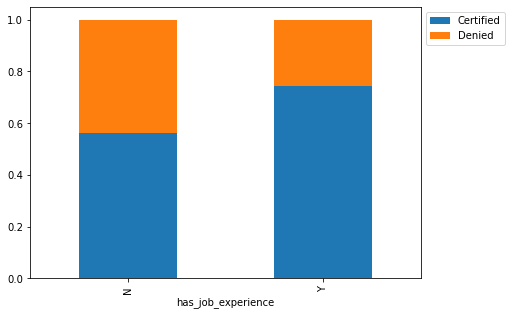

<IPython.core.display.Javascript object>

In [42]:
#plotting the stacked barplot for has job experience and case status
stacked_barplot(data, "has_job_experience", "case_status")

Observations:
- From this stacked bar plot, we can see that there is a higher likelihood of an application being certified if the employee has job experienced
- The stacked barchart shoes that there is a 44% likelihood that the application will be denied if the employee has no job experienced..

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


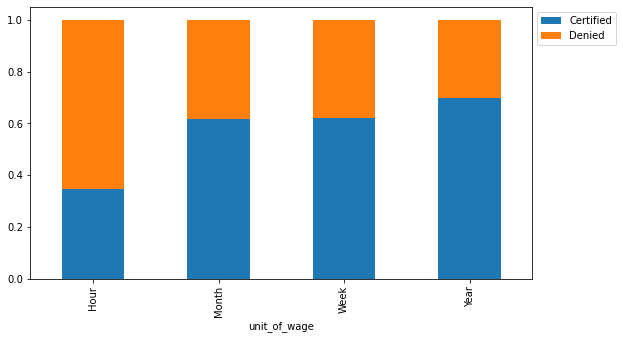

<IPython.core.display.Javascript object>

In [43]:
#plotting the stacked barplot for unit of wage and case status
stacked_barplot(data, "unit_of_wage", "case_status")

Observations:
There are some interesting observations here.
- The highest percentage of denials came from the hour unit of wage with about 65% of the applications resulting to denials. it seems to me that those who offer this type of employemnt or take this type of employment may show less commitment and this may be a determining factor
- The least percentage of denials is from the yearly unit of wage. In my opinion, if one offers an employee employment using the yearly unit of wage, it may show that the employer is more committed to that employee and the employee will be able to contribute to the economy for atleast a year.
- those in the category of weekly and monthly unit of wage are less likely to be denied than those in the hourly category, but more likely to be denied than those in the year category

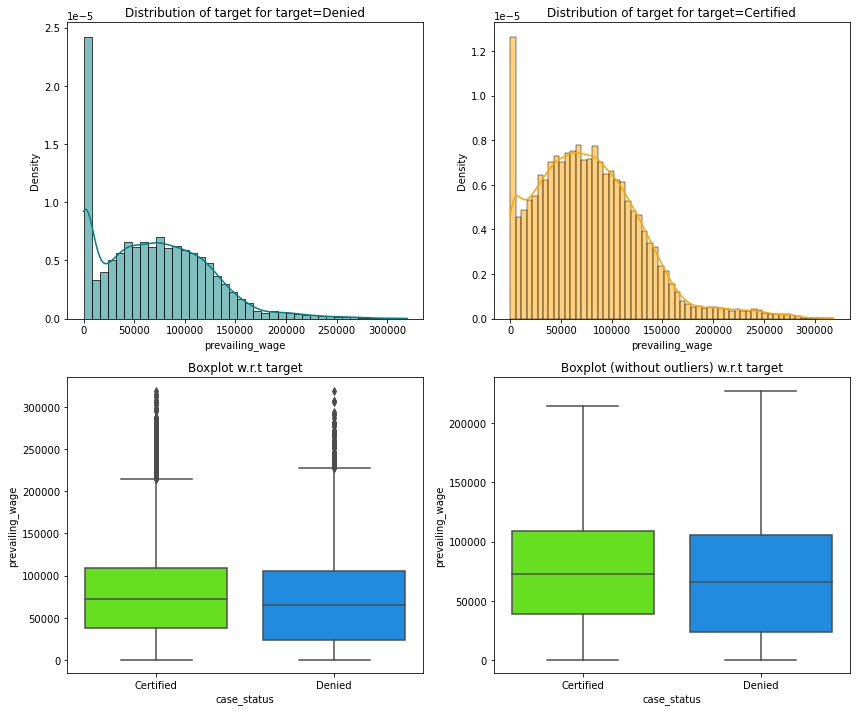

<IPython.core.display.Javascript object>

In [44]:
# Checking the distribution of prevailing wage with respect to target
distribution_plot_wrt_target(data,'prevailing_wage','case_status') 

Observation:
- We can observe similar densities in both the booking status and prevailing wage of the employees.
- We can also see, however that the major difference between the 2 is that there is significantly higher density in the denial for prevailing wage between 0 and 100
- Looking at the boxplot of prevailing wage with respect to case status, we can observe that the median prevailing wage of the employees who are certified is slightly higher.
- When we look at the boxplot without outliers, we see that the maximum prevailing wage of employees which were denied is higher than those that were certified.

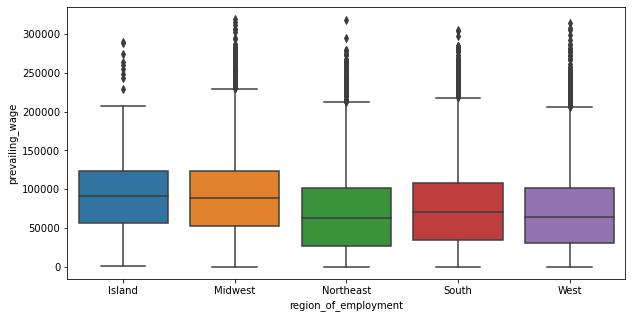

<IPython.core.display.Javascript object>

In [45]:
#Creating the boxplot for region of employment and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot (data= data, x= 'region_of_employment', y= 'prevailing_wage')
plt.show()

Observations:
- We can see from the box plots that both the island and midwest regions have higher prevailing wages in the 75th percentile that others.
- The North east and west region of employemnts have the lowest prevailing wages, and the south is somewhere in the middle
- The maximum prevailing wages are in the Northeast and midwest region. 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [46]:
#Checking for missing values
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

Observations:
- There are no missing values in the data set so there will be no need to treat them.

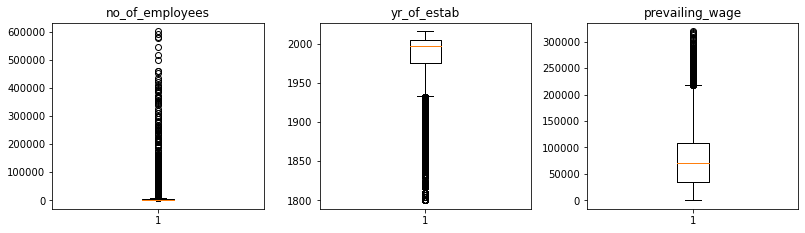

<IPython.core.display.Javascript object>

In [47]:
#Checking for outliers in the dataset using boxplot

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
- The three numerical variables have outliers, however we will not treat them for the following reasons:
    1. The no of employees can vary depending on the tyoe of business,and so it is not unusual to find companies with thousands of employees, especially when they have been in business for many years. we will not treat the no of employees outliers.
    2. For the year of establishment, it is not unusual that we are seeing companies that are over 200 years old. some companies have been passed on frm generation to generation, while others are just starting. we will not treat these outliers as they contain valuable information.
    3. The prevailing wage is recorded without considering the unit of wages, thus, if we treat the outlier shere, we will not capture the information adequately. Prevailing wage also can vary based on many factors such as the industry or level of education. hence, we will not treat the outliers in this column

## EDA

- It is a good idea to explore the data once again after manipulating it.

Observations:
Because we have not manipulated the data by treating outliers, filling null values of removing duplicates, we will not be re exploring the data.

## Preparing the data for Modeling


In [48]:
#Looping through all the columns in the data frame and replacing categorical strings with integers
for feature in data.columns:
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature])
data.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


<IPython.core.display.Javascript object>

In [49]:
#Encoding the values in the target variable
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

#defining the dependent and independent variables
X = data.drop(['case_status'], axis=1)
Y = data["case_status"]


#getting dummies for the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1, stratify=Y) 

<IPython.core.display.Javascript object>

In [50]:
#Printing the shape of both the training and testing set to see how they've been split
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>


### Model evaluation criterion

Model can make wrong predictions as:

- Predicting that the visa application will get certified but in reality,it is denied.
- Predicting that the visa application will not get certified but in reality,it is certified.

Which case is more important?

Both the cases are important as:

If we predict that a visa should be certified when the visa should in fact be denied, we would put in the wrong candidate for the job and the employers would not be satisfied. it means we would have denied the employers the opportunity to pick a more suitable candidate and have denied other more suitable employees the position.

If we predict that a visa should be denied when it should be certified, we deny the employee a chance of a job opportunity, and we deny the employers a suitable candidate that can contribute to their company and also the US economy.
 

Both cases are important, so we can use the F1 score as the metric for evaluation of the model since the greater the F1 score, the less the false negatives and false positives.


### Creating the functions to calculate different metrics and confusion matrix

- The get_metrics_score function will be used to check the model performance of models.
- The confusion_matrix_sklearnfunction will be used to plot the confusion matrix

In [51]:
#Creating functions to calculate different metrics, so that we can avoid repetition of code.
#  Function to calculate different metric scores of the model - Accuracy, Recall ,Precision and F1 score
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_F1 = metrics.f1_score(y_train,pred_train)
    test_F1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_F1,test_F1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [52]:
#Defining the function to show the confusion matrix as we will be needing it frequently using sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Decision tree Model



In [53]:
#fitting the decision tree on training data
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

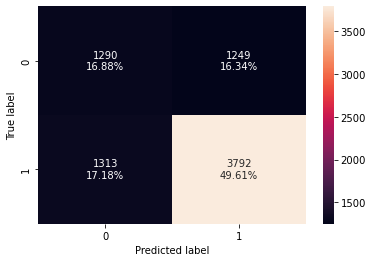

<IPython.core.display.Javascript object>

In [54]:
#Checking performance on the test set
#creating the confusion matrix for the test set
confusion_matrix_sklearn(decision_tree,X_test,y_test)

In [55]:
#Checking the performance on the training and testing set
#Checking the performance on the training set
decision_tree_score = get_metrics_score(
    decision_tree
)
decision_tree_score

Accuracy on training set :  1.0
Accuracy on test set :  0.6648351648351648
Recall on training set :  1.0
Recall on test set :  0.7428011753183154
Precision on training set :  1.0
Precision on test set :  0.752231700059512
F1 on training set :  1.0
F1 on test set :  0.7474866942637493


[1.0,
 0.6648351648351648,
 1.0,
 0.7428011753183154,
 1.0,
 0.752231700059512,
 1.0,
 0.7474866942637493]

<IPython.core.display.Javascript object>

Observations from the decision tree Model:
- We can notice some overfitting in the training data of this model. The accuracy has the poorest performance on the test set
-  The F1 score is 0.75 for the testing set 
- We will consider hyperparameter tuning to see if we can get a better performance for this model in the next section

## Building bagging and boosting models

#### Bagging Model with default parameters

In [56]:
#Building the bagging classifier
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [57]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9851984749943934
Accuracy on test set :  0.6915227629513344
Recall on training set :  0.9859817006631411
Recall on test set :  0.764152791380999
Precision on training set :  0.9918095077260829
Precision on test set :  0.7717111770524233
F1 on training set :  0.988887018016501
F1 on test set :  0.7679133858267716


<IPython.core.display.Javascript object>

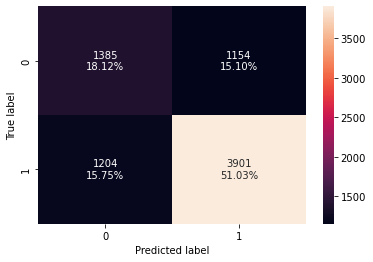

<IPython.core.display.Javascript object>

In [58]:
#Getting the confusion matrix for the testing data
confusion_matrix_sklearn(bagging_estimator,X_test,y_test)

Observations from the bagging classifier Model:
- We notice some overfitting in this model
- The F1 score for the testing set is 0.77
- since we can observe some overfitting in the model, so we will try hyperparameter tuning to see if we get better performance in terms of fitting and stability

#### Random forest model with default parameters

In [59]:
#Building a random forest model
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [60]:
#Using above defined function to get accuracy, recall, precision and F1 on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  0.999943933617403
Accuracy on test set :  0.7208267922553637
Recall on training set :  0.9999160580878033
Recall on test set :  0.8321253672869735
Precision on training set :  1.0
Precision on test set :  0.768868778280543
F1 on training set :  0.9999580272822666
F1 on test set :  0.7992474129821261


<IPython.core.display.Javascript object>

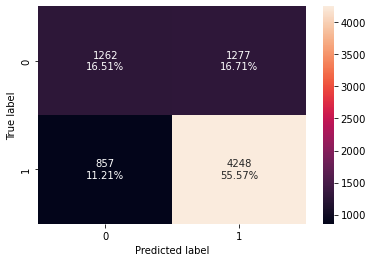

<IPython.core.display.Javascript object>

In [61]:
# Checking the confusion matrix for the test set
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

Observations from the Random forest classifier Model: 
- We can observe little overfitting in the model, though the F1 in this model is the best so far at 0.799.
- We will try hyperparameter tuning to see if we get can get a better performance. 

#### Ada boost classifier with default parameters

In [62]:
#AdaBoost classifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [63]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7382260596546311
Accuracy on test set :  0.7343014128728415
Recall on training set :  0.8871820700075548
Recall on test set :  0.8850146914789422
Precision on training set :  0.7606880667914208
Precision on test set :  0.75779939617578
F1 on training set :  0.8190800945479909
F1 on test set :  0.8164814312821903


<IPython.core.display.Javascript object>

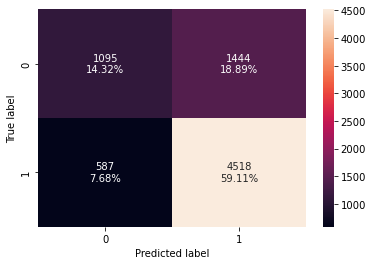

<IPython.core.display.Javascript object>

In [64]:
#Checking the confusion matrix for the test set.
confusion_matrix_sklearn(abc,X_test,y_test)

Observations from Adaboost classifier:
- This is a good model in terms of fitting and stability
- The F1 score performs well at approximately 0.82. it has a really good recall and a good accuracy and precision score as well
- We can still try to tune the hyper parameters to see if we can get a better model

#### Gradient boost classifier with default parameters

In [65]:
#GradientBoosting classifier
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [66]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7588024220677282
Accuracy on test set :  0.7447671376242805
Recall on training set :  0.8837404516074876
Recall on test set :  0.8760039177277179
Precision on training set :  0.7830420230568985
Precision on test set :  0.7723661485319516
F1 on training set :  0.8303493966401135
F1 on test set :  0.8209270307480495


<IPython.core.display.Javascript object>

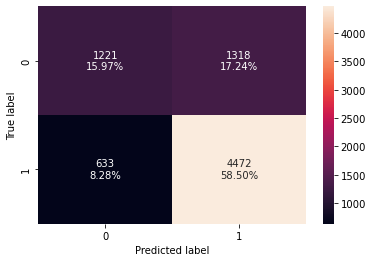

<IPython.core.display.Javascript object>

In [67]:
# creating the confusionmatrix for the test set
confusion_matrix_sklearn(gbc,X_test,y_test)

Observations from GBM classifier:
- This is a good model and has little or no overfitting
- The F1 score performs well at 0.82. it has a really good recall and a decent accuracy and precision score as well

#### XG boost classifier with default parameters

In [68]:
#XGboost classifier
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [69]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8387530836510428
Accuracy on test set :  0.7332548403976975
Recall on training set :  0.9314194577352473
Recall on test set :  0.8607247796278159
Precision on training set :  0.8434815659445077
Precision on test set :  0.7679133170220203
F1 on training set :  0.8852720599968088
F1 on test set :  0.8116745174101783


<IPython.core.display.Javascript object>

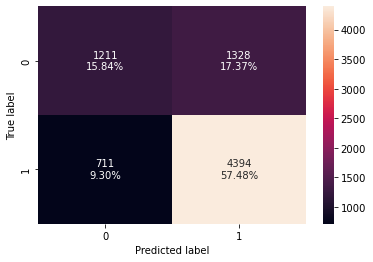

<IPython.core.display.Javascript object>

In [70]:
#creating a confusion matrix for the test set
confusion_matrix_sklearn(xgb,X_test,y_test)

Observations from GBM classifier:
- This model has a good performance
- The F1 score performs well at 0.81
- The model is stable but it's not the best in stability out of the models built so far

**Overall Model performances With default parameters:**
- The decision tree model has the poorest performance
- The bagging classifier has slightly better F1 score than the random forest classifier.
- The random forest classifier has better test accuracy and recall
- The Adaboost and GB classifier models are the best performing with the f1 score at 0.82 with the default parameters.
- XGB classifier has the least stability though it has the same f1 score as the Adaboost and GB classifier.


##  Will tuning the hyperparameters improve the model performance?

#### Tuned Decision tree classifier 

In [71]:
#Tuning the decision tree
#using Grid search for hyperparameter tuning

#Choose the type of classifier. 
Decision_tree_tuned= DecisionTreeClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(5,16,5), 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(Decision_tree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Decision_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
Decision_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

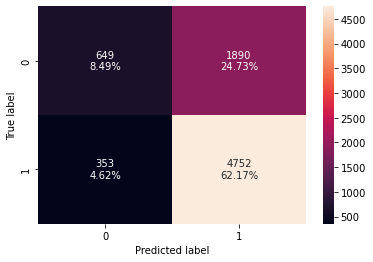

<IPython.core.display.Javascript object>

In [72]:
#Checking the performance on the testing set
#Creating a confusion matrix for the test set
confusion_matrix_sklearn(Decision_tree_tuned, X_test, y_test)

In [73]:
#Checking the performance on both the training and testing set
decision_tree_tune_perf = get_metrics_score(Decision_tree_tuned)
decision_tree_tune_perf

Accuracy on training set :  0.7125476564252075
Accuracy on test set :  0.706567242281528
Recall on training set :  0.9319231092084278
Recall on test set :  0.9308521057786484
Precision on training set :  0.7200674536256324
Precision on test set :  0.7154471544715447
F1 on training set :  0.8124108155574256
F1 on test set :  0.8090576317357624


[0.7125476564252075,
 0.706567242281528,
 0.9319231092084278,
 0.9308521057786484,
 0.7200674536256324,
 0.7154471544715447,
 0.8124108155574256,
 0.8090576317357624]

<IPython.core.display.Javascript object>

Observations:
- The performance of the decision tree is very much better after hyperparameter tuning. The F1 score has really improved and is now 0.81.
- It has a great recall and a good accuracy and precision. 
- It's a good model and can be selected as the final model

#### Tuned Bagging classifier 

In [74]:
#Tuning the Bagging classifier model
#Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [70,80,90,100,110],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

<IPython.core.display.Javascript object>

In [75]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9961874859834043
Accuracy on test set :  0.7242281527995814
Recall on training set :  0.9999160580878033
Recall on test set :  0.8953966699314397
Precision on training set :  0.9944068787043994
Precision on test set :  0.7438567941415786
F1 on training set :  0.9971538590323121
F1 on test set :  0.8126222222222222


<IPython.core.display.Javascript object>

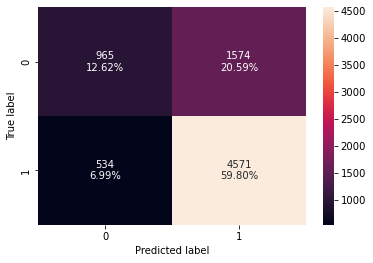

<IPython.core.display.Javascript object>

In [76]:
#Checking the confusion matrix for the test set
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

Observations:
- The performance of the bagging classifier is much better in terms of stability and performance after hyperparameter tuning.
- It has an f1 score 0.81 which is good. 
- It's a good model

#### Tuned Random forest classifier 

In [77]:
#Tuning the random forest classifier model
#Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [5,10,15,20],
    "max_features": np.arange (0.2, 0.7, 0.1),
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15,31,5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.30000000000000004, min_samples_split=7,
                       n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

In [78]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9342341332137251
Accuracy on test set :  0.7309000523286238
Recall on training set :  0.9758247292873332
Recall on test set :  0.849951028403526
Precision on training set :  0.9292565947242206
Precision on test set :  0.7706927175843694
F1 on training set :  0.9519715022724482
F1 on test set :  0.808383791336749


<IPython.core.display.Javascript object>

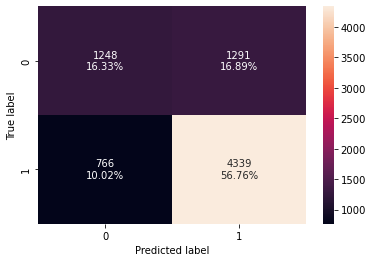

<IPython.core.display.Javascript object>

In [79]:
# checking the confusion matrix for the test set
confusion_matrix_sklearn(rf_estimator_tuned,X_test,y_test)

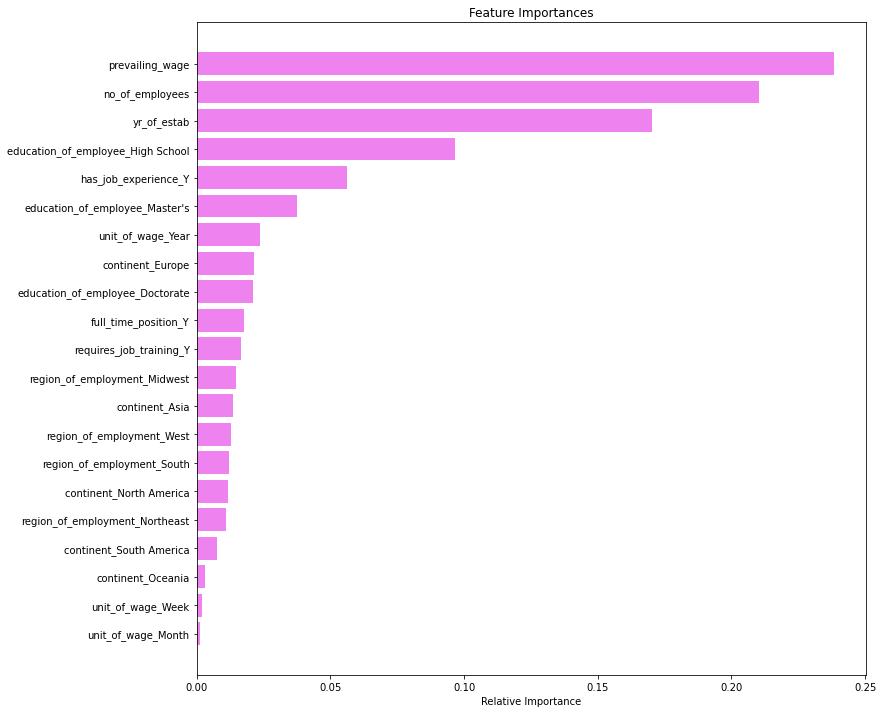

<IPython.core.display.Javascript object>

In [80]:
#Checking the important features for this model
feature_names = X_train.columns
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:
- The F1 score of 0.81 the random forest model is slightly better after hyper parameter tuning because the recall has improved.
- We can see that it is still not the best model so far, though it is slightly less overfitting than the default parameter model.
- The top 5 important features here are prevailing wage,no of employees, year of establishment,education of employee (high school) and has job experience (Y)

#### Tuned Adaboost classifier 

In [81]:
#Adaboost hyperparameter tuning
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight='balanced', random_state=1),DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=1),],
    "n_estimators": np.arange(80,101,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

In [82]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.7189952904238619
Accuracy on test set :  0.7165096807953951
Recall on training set :  0.7812473768152438
Recall on test set :  0.7813907933398628
Precision on training set :  0.7945872107914284
Precision on test set :  0.7914682539682539
F1 on training set :  0.7878608312875646
F1 on test set :  0.7863972400197141


<IPython.core.display.Javascript object>

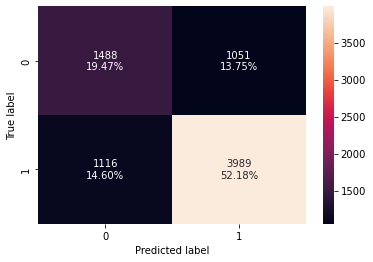

<IPython.core.display.Javascript object>

In [83]:
#Checking the confusion matrix for the test set
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

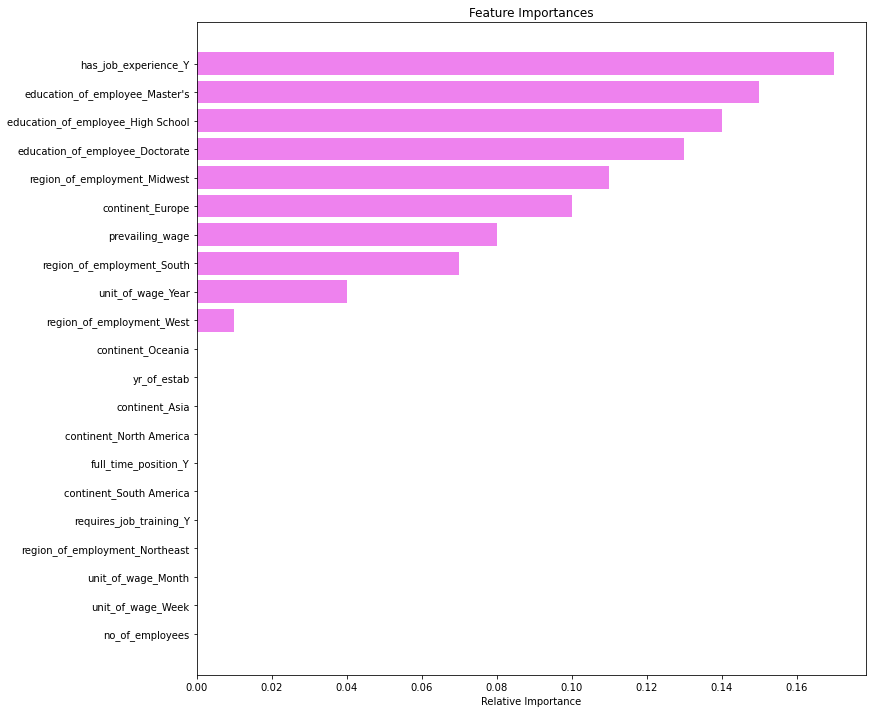

<IPython.core.display.Javascript object>

In [84]:
#Checking the important features of the model
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:
- The performance of the adaboost model tree is much better in the default model than after hyperparameter tuning.
- The default gives a better f1 score.
- The tuned model is equally as stable as the default, but overall the performance is poorer in the tuned model
- Here, the top 5 important features are has job experience (Y), Education of employee ( masters, high school and doctorate) and region of employment (midwest)

#### Tuned GB classifier 

In [85]:
#Tuning GB
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate": np.arange(0.1,0.21,0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

In [86]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7334043507512895
Accuracy on test set :  0.7231815803244375
Recall on training set :  0.923780743725342
Recall on test set :  0.9198824681684623
Precision on training set :  0.7409776461082682
Precision on test set :  0.7334062158363267
F1 on training set :  0.8223426116196526
F1 on test set :  0.8161279110184219


<IPython.core.display.Javascript object>

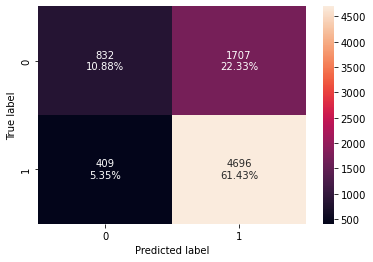

<IPython.core.display.Javascript object>

In [87]:
#Checking the confusion matrix for the test set
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

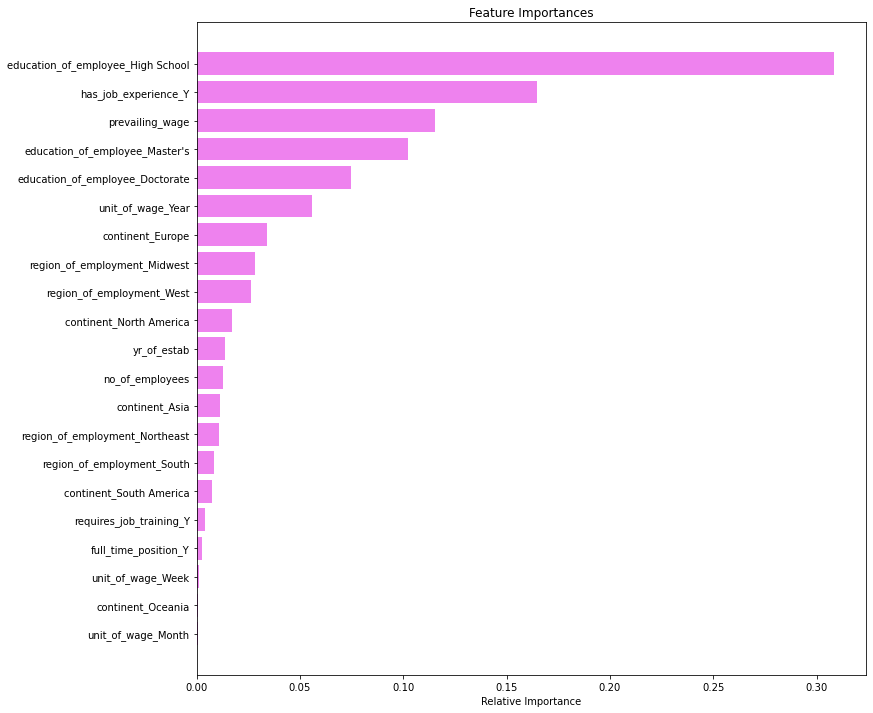

<IPython.core.display.Javascript object>

In [88]:
# Checking the important features 
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:
- The performance of the GBM model gives approximately the same F1 score before and after hyperparameter tuning.
- In terms of precision and accuracy, the default model has a slightly better score. recall is however better in this tuned model.
- The top 5 important features here are eduction of employee (high school, bachelors and masters), has job experience (y),prevailing wage  and unit of wage.

#### XGboost classifier 

In [89]:
#Tuning XGBoost
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [150,200,250],
    "scale_pos_weight":[1,2,],
    "subsample":[0.9,1],
    "learning_rate":[0.1,0.2,0.3],
    "gamma":[3,5],
    "colsample_bytree":[0.8,0.9],
    "colsample_bylevel":[0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [90]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.7545974433729535
Accuracy on test set :  0.7210884353741497
Recall on training set :  0.9750692520775623
Recall on test set :  0.9535749265426053
Precision on training set :  0.7400611620795107
Precision on test set :  0.7197989058110306
F1 on training set :  0.8414647397587743
F1 on test set :  0.8203572632288507


<IPython.core.display.Javascript object>

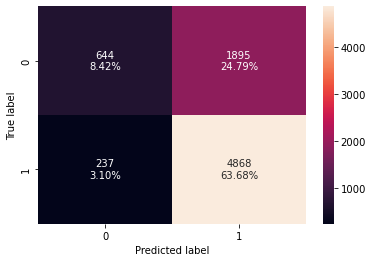

<IPython.core.display.Javascript object>

In [91]:
#Checking the confusion matrix for the test set
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

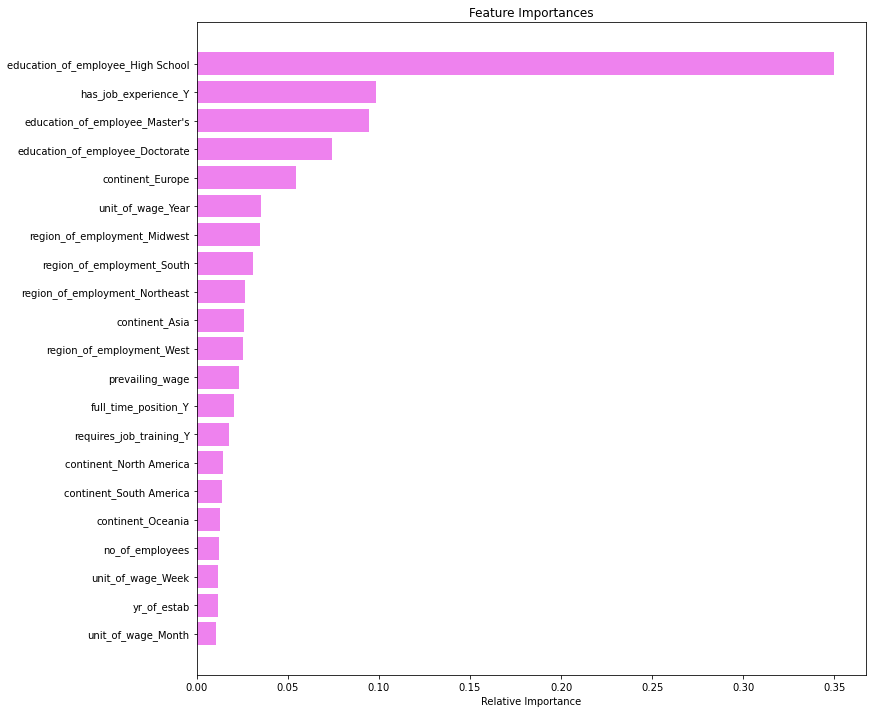

<IPython.core.display.Javascript object>

In [92]:
# Checking the important features
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations:
- The performance of the XGBoost model gives a slightly better F1 score before after hyperparameter tuning.
- Recall is slightly better in terms of fitting in this tuned model but the precisiona nd accuracy of the default model is better.
- The top 5 important features here are eduction of employee (high school, bachelors and masters), has job experience (y),prevailing wage  and unit of wage.

#### Summary of all Model Performances after tuning:
- After tuning the decision tree, the performance remains the same
- After tuning the bagging classifier also performed better than the default parameters. it now has an f1 score of 0.80 which is good.
- The F1 score of the random forest model is higher by 0.1 after tuning. 
- The adaboost classifier had a slightly lower performance after tuning, as the f1 score was less by 0.3 thought it is still a good model.
- The tuned GB classifier has pretty much the same performance before and after tuning. it seems to be a great model.
- The tuned xgb model has an f1 score simiular to the untuned model, with a slight increase of 0.1
- The important features here are education of employee (highschool, masters and doctorate), has job experience (y) and continet, Europe

#### Stacking classifier 

In [93]:
#Stacking Classifier
estimators = [
    ("AdaBoost", abc),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_estimator_tuned),
]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=1,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features=0.30000000000000004,
                                                       min_samples_split=7,
                                                       n_estimators=30,
                                                       random_state=1))],
                   final_estimato...
                                                 eval_metric='logloss', gamma=5,
                                                 gpu_id=-1,
    

<IPython.core.display.Javascript object>

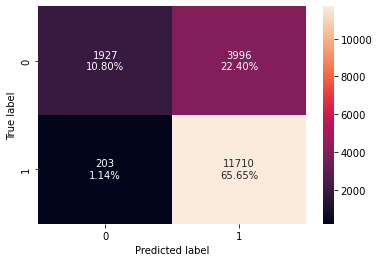

<IPython.core.display.Javascript object>

In [94]:
#Checking the confusion matrix of the train set
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

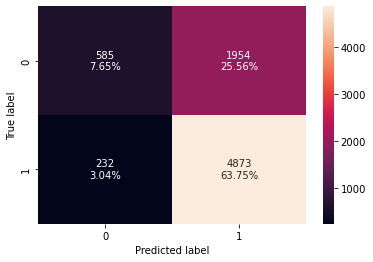

<IPython.core.display.Javascript object>

In [95]:
#Checking the confusion matrix on the test set
confusion_matrix_sklearn(stacking_classifier,X_test, y_test)

In [96]:
#Using above defined function to get accuracy, recall,precision and F1score on train and test set
stacking_classifier_model_perf = get_metrics_score(stacking_classifier)
stacking_classifier_model_perf

Accuracy on training set :  0.7645772594752187
Accuracy on test set :  0.7140240711669283
Recall on training set :  0.9829597918240578
Recall on test set :  0.9545543584720861
Precision on training set :  0.7455749395135617
Precision on test set :  0.7137835066647137
F1 on training set :  0.8479669792534125
F1 on test set :  0.8167951726449884


[0.7645772594752187,
 0.7140240711669283,
 0.9829597918240578,
 0.9545543584720861,
 0.7455749395135617,
 0.7137835066647137,
 0.8479669792534125,
 0.8167951726449884]

<IPython.core.display.Javascript object>

Observations:
   - The model performs good on bothe training and testing data and has a nice F1 score of 0.82
   - There is very little or no overfitting

## Model Performance Comparison and Conclusions

In [97]:
# defining list of models
models = [decision_tree, Decision_tree_tuned, bagging_estimator, bagging_estimator_tuned, rf_estimator, rf_estimator_tuned,abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_score_train = []
F1_score_test = []

# looping through all the models to get the accuracy, recall, precision scores and F1 score
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    F1_score_train.append(np.round(j[6],2))
    F1_score_test.append(np.round(j[7],2))

<IPython.core.display.Javascript object>

In [98]:
comparison_frame = pd.DataFrame({'Model':['Decision tree', 'Decision tree tuned', 'Bagging estimator', 'Bagging estimator tuned', 'Random forest', 'Random Forest Tuned','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned', 'Stacking classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,'Train_F1':F1_score_train,'Test_F1':F1_score_test }) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision tree,1.00,0.66,1.00,0.74,1.00,0.75,1.00,0.75
1,Decision tree tuned,0.71,0.71,0.93,0.93,0.72,0.72,0.81,0.81
2,Bagging estimator,0.99,0.69,0.99,0.76,0.99,0.77,0.99,0.77
3,Bagging estimator tuned,1.00,0.72,1.00,0.90,0.99,0.74,1.00,0.81
4,Random forest,1.00,0.72,1.00,0.83,1.00,0.77,1.00,0.80
5,Random Forest Tuned,0.93,0.73,0.98,0.85,0.93,0.77,0.95,0.81
6,AdaBoost with default paramters,0.74,0.73,0.89,0.89,0.76,0.76,0.82,0.82
7,AdaBoost Tuned,0.72,0.72,0.78,0.78,0.79,0.79,0.79,0.79
8,Gradient Boosting with default parameters,0.76,0.74,0.88,0.88,0.78,0.77,0.83,0.82
9,Gradient Boosting Tuned,0.73,0.72,0.92,0.92,0.74,0.73,0.82,0.82


<IPython.core.display.Javascript object>

### Observations from the Model comparisons
- Both the performance of the decision tree and random forest models are very much better after hyperparameter tuning. The F1 score has really improved at  0.81.
- The Adaboost with default parameters, GB with default parameters, GB tuned, XGboost tuned and Stacking classifier scores have the best F1 scores at 0.82
- In terms of Stability, both gradient boost models (default and tuned) and the adaboost model are the most stable models also with high performance. any of them may be considered for the final model.
- The models with the best recall are the xg boost and stacking classifier models. these can be considered in case at some point, OFLC prefers reducing false negatives and prefers recall as the best metric in future
- The tuned ada boost model has the highest precision performance on the test set. this can be considered if at some point, OFLC prefers precision as the most important metric 
- While generally, the models have performed well, the poorest performing models here are the decision tree and bagging estimator model with default parameters, and the adaboost tuned model.

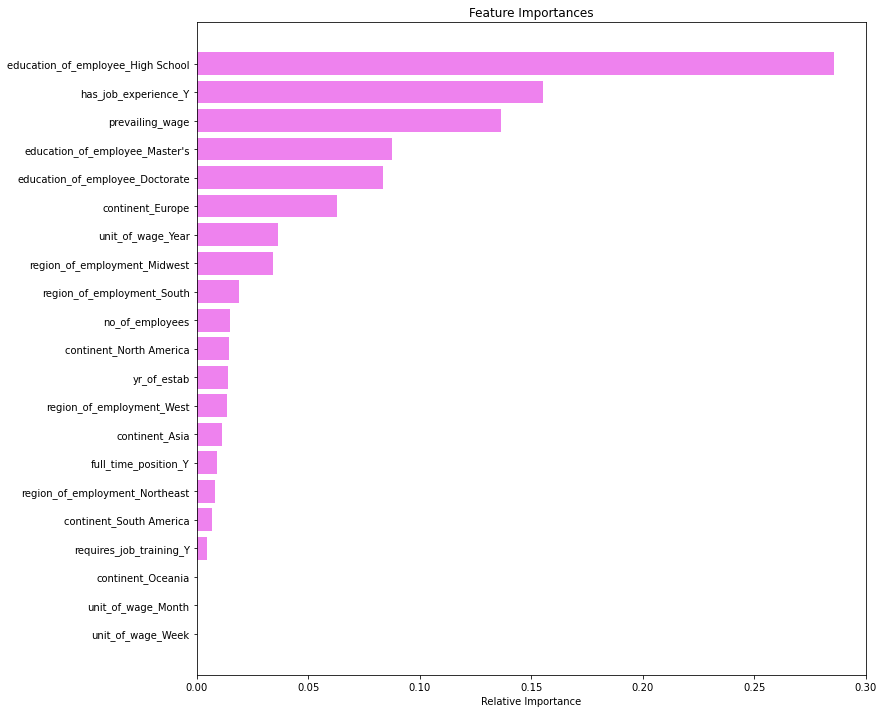

<IPython.core.display.Javascript object>

In [99]:
#Checking the important features in the most preferred model
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [100]:
#Computing the important features in the tree building in a normalized form
print(pd.DataFrame(gbc.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                        Imp
education_of_employee_High School  0.285978
has_job_experience_Y               0.155462
prevailing_wage                    0.136663
education_of_employee_Master's     0.087565
education_of_employee_Doctorate    0.083538
continent_Europe                   0.063035
unit_of_wage_Year                  0.036526
region_of_employment_Midwest       0.034432
region_of_employment_South         0.019024
no_of_employees                    0.014866


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

### Insights
- Considering the EDA and the GB Classifier model, the top 10 most important features to decide whether a visa gets certified or denied are Education of employee (High school, masters and doctorate), Has Job experience (Y), prevailing wage, Continent (Europe), Unit of wage (Year),Region of employment (Midwest and South) and number of employees.

- The most important feature with a magnitude of 0.29 is the education of employee. From the EDA, we saw that if an employee possesses a high school degree (likely as the highest level of qualification), that employee is more likely to be denied than accepted. Employees with doctorate degrees have the highest chances of getting certified, so they should be encouraged to apply. Likewise employees with masters degrees, also have better chances than those with high school degrees and should also be encouraged to apply for roles.

- If an employee has job experience, they are more likely to be certified than those who do not have prior job experience. those without experience are likely to be denied. 

- If an employee is from Europe, he has greater chances of getting certified than any other continent.

- Employees with a higher prevailing wage are likely to be certified, and this is in line with the unit of wage being in years. 

- When the pay unit is in years, there are greater chances of being certified than if it is a different pay unit.  

- If the region of employment is midwest or south, employees have higher chances of being certified than denied. employees who apply to other regions have higher chances of being denied.

- With respect to the number of employees, the higher the number of employees, the higher the chances of getting approved.

- Interestingly, other factors like requirement for job training, year of establishment and full time or part time employment, do not appear to affect the denial or certification significantly 


### Recommendations

- To make the otherwise tedius task of screening a lot easier, the OFLC can prioritize employees from Europe with higher degrees, who have some job experience and with the intention of getting employed in Midwest or south at a company with large number of employees and which uses years as the pay unit. They can shortlist applications that fall under this category first and there after review other applications

- They can also educate the employing companies and encourage them to adjust their job ads or job application requirements based on the important features, so that they attract candidates that have better chances of getting their visas certified.

- The OFLC can also implement (or advise the concerned department to implement) specialized worker programs that specifically attract talent based on consideration of these important features, so that they can possibly focus on that program for employees. They could use some of the important features as an eligibility criteria. It is also a win for employers as they can go to the same pool to find suitable employees for their businesses.

- They could also implement a point system for employees, with the important features deciding which criteria should be scored and how they can be scored. The summary of their details are quantified into points and the OFLC can begin to screen the applicants with the higher points first.